In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Golf Data

### Read Data

In [19]:
df = pd.read_csv('data/golf-dataset.csv')
df.head()

,Outlook,Temp,Humidity,Windy,Decision
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [20]:
df.dtypes

Outlook     object
Temp        object
Humidity    object
Windy         bool
Decision    object
dtype: object

### Data Preprocessing

In [21]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['Outlook']= label_encoder.fit_transform(df['Outlook'])
df['Temp']= label_encoder.fit_transform(df['Temp'])
df['Humidity']= label_encoder.fit_transform(df['Humidity'])
df['Decision']= label_encoder.fit_transform(df['Decision'])

In [22]:
df.head()

,Outlook,Temp,Humidity,Windy,Decision
0,1,1,0,False,0
1,1,1,0,True,0
2,0,1,0,False,1
3,2,2,0,False,1
4,2,0,1,False,1


In [23]:
X = df.drop(columns = ['Decision'])
y = df['Decision']

In [24]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Apply Support Vector Classifier


In [25]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
y_pred = svclassifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [28]:
print("Accuracy: ", ac)

Accuracy:  0.75


<AxesSubplot:>

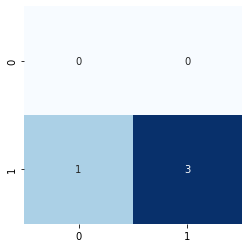

In [29]:
import seaborn as sn
sn.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

## 2. Customer Data (Kaggle)

### Read Data

In [30]:
df = pd.read_csv('data/kaggle/customer_data.csv')
df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [31]:
df.dtypes

label       int64
id          int64
fea_1       int64
fea_2     float64
fea_3       int64
fea_4     float64
fea_5       int64
fea_6       int64
fea_7       int64
fea_8       int64
fea_9       int64
fea_10      int64
fea_11    float64
dtype: object

### Data Preprocessing

In [32]:
df.isna().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.tail()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
1119,0,54985816,7,1320.5,3,108000.0,2,11,5,110,4,510068,248.997992
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000
1124,0,54989781,4,1415.0,3,93000.0,2,8,5,113,4,151300,273.861279


In [35]:
df.dtypes

label       int64
id          int64
fea_1       int64
fea_2     float64
fea_3       int64
fea_4     float64
fea_5       int64
fea_6       int64
fea_7       int64
fea_8       int64
fea_9       int64
fea_10      int64
fea_11    float64
dtype: object

In [36]:
# Import MinMaxScaler
from sklearn import preprocessing
 
minMaxScaler = preprocessing.MinMaxScaler()

df[df.columns] = minMaxScaler.fit_transform(df[df.columns])

In [37]:
X = df.drop(columns = ['label'])
y = df['label']

In [38]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Apply Support Vector Classifier


In [68]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [69]:
y_pred = svclassifier.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [71]:
print("Accuracy: ", ac)

Accuracy:  0.819672131147541


<AxesSubplot:>

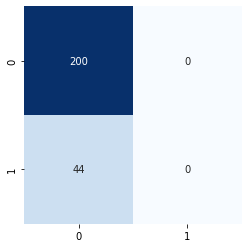

In [72]:
import seaborn as sn
sn.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)